# Learning about penguins

Then penguins dataset has measurements about penguins of several different species from several different islands.

These are the questions I'd like to answer:
- Do penguins with longer flippers have longer bills?
- Is the distribution of penguin weights a normal distribution?
- How are the different species spread out across the islands?
- Are there differences between penguins of the same species
  when they are found on different islands?
- If I want to predict the species of a penguin from one measurement, which would be better: bill depth or body mass?
  
Instructions (please read carefully):
- Put code in the cells as indicated.  Do not change any other code.  Don't add or remove any cells.
- Use an expression, an assignment statement, or plotting statements as instructed.
- Give your plots titles and appropriate x/y labels.
- Use a semi-colon (;) at the end of the last plotting statement in a cell.
- Run all the cells in your notebook before submission (Colab: Runtime/Run all.  Jupyter notebook: Kernel/Restart and run all.)

In [1]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

In [2]:
# graphics
sns.set()
sns.set_context('talk')

# change default plot size
rcParams['figure.figsize'] = 7,5

### Read the data

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')

# remove rows containing NA values
df.dropna(inplace=True)

### Part 1: data exploration

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [5]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


####@ 1

Create a histogram of penguin body mass (in kilograms).
A kilogram is 1000 grams.  

(Write plotting statements.)

Text(0, 0.5, 'count')

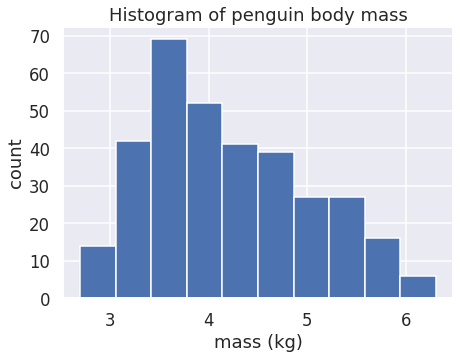

In [32]:
plt.hist(df['body_mass_g']/1000)
plt.title('Histogram of penguin body mass')
plt.xlabel('mass (kg)')
plt.ylabel('count')

####@ 2

Compute the number of penguins in each of the species in the data set.

(Write an expression.)

In [7]:
df['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

####@ 3

Compute the number of penguins in each of the islands in the data set.

(Write an expression.)

In [8]:
df['island'].value_counts()

Biscoe       163
Dream        123
Torgersen     47
Name: island, dtype: int64

### Part 2: Do penguins with longer flippers have longer bills?

####@ 4

Compute the mean flipper length.  Your answer should be a single number.

(Write an expression.)

In [ ]:
df['flipper_length_mm'].mean()

200.96696696696696

####@ 5

Compute the standard deviation of flipper length.  Your answer should be a single number.

(Write an expression.)

In [9]:
df['flipper_length_mm'].std()

14.015765288287882

####@ 6

Create a histogram of flipper length.

(Write plotting statements.)

Text(0, 0.5, 'count')

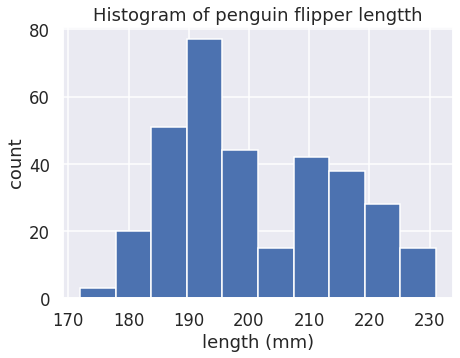

In [10]:
plt.hist(df['flipper_length_mm'])
plt.title('Histogram of penguin flipper lengtth')
plt.xlabel('length (mm)')
plt.ylabel('count')

####@ 7

Create a scatter plot of flipper length (x axis) and bill length (y axis).
Show the penguin species using the dot color.

Use Seaborn scatterplot(), and use the hue parameter to color the
dots according to 'species'.

(Write plotting statements.)

[Text(0, 0.5, 'bill length (mm)'),
 Text(0.5, 0, 'flipper length (mm)'),
 Text(0.5, 1.0, 'Flipper length and Bill length')]

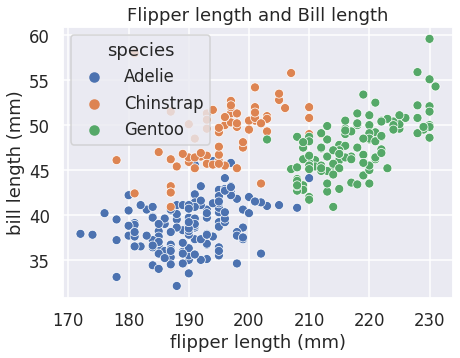

In [11]:
sns.scatterplot(x = "flipper_length_mm", y =  "bill_length_mm",data = df, hue = "species" ).set(title='Flipper length and Bill length', xlabel='flipper length (mm)', ylabel='bill length (mm)')


####@ 8

Create a 2d density plot of flipper length (x axis) and bill length (y axis)
Use Seaborn's kdeplot().  

If you like, use the hue parameter with value 'species'.

(Write plotting statements.)

[Text(0, 0.5, 'bill length (mm)'),
 Text(0.5, 0, 'flipper length (mm)'),
 Text(0.5, 1.0, 'Flipper length and Bill length')]

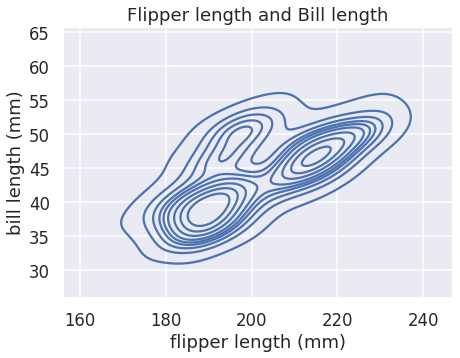

In [13]:
sns.kdeplot(x = df.flipper_length_mm, y = df.bill_length_mm).set(title='Flipper length and Bill length', xlabel='flipper length (mm)', ylabel='bill length (mm)')

####@ 9

Compute a data frame containing the rows of df in which the
penguin has above average flipper length.

(Write an expression.)

In [12]:
df[df.flipper_length_mm > df.flipper_length_mm.mean()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
90,Adelie,Dream,35.7,18.0,202.0,3550.0,FEMALE
91,Adelie,Dream,41.1,18.1,205.0,4300.0,MALE
95,Adelie,Dream,40.8,18.9,208.0,4300.0,MALE
101,Adelie,Biscoe,41.0,20.0,203.0,4725.0,MALE
123,Adelie,Torgersen,41.4,18.5,202.0,3875.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


####@ 10

Compute the probability that a penguin has above average bill length.
You should expect a result not far from 0.5, right?

(Write an expression.)

In [14]:
(df.bill_length_mm > df.bill_length_mm.mean()).mean()

0.5135135135135135

####@ 11

Compute the probability that a penguin has above average bill
length given it has above average flipper length.  

This is a conditional
probability.  I suggest writing two lines of code.  The first will creating a data frame containing
only rows in which a penguin has above average flipper length.  The second will compute the probability.  The second line must be an expression.

Be careful: the average bill length you use should be computed
from the full data set.

(Write an expression.  The expression can be preceded by other lines.)

In [15]:
ndf = df[df.flipper_length_mm > df.flipper_length_mm.mean()]
(ndf['bill_length_mm'] > df.bill_length_mm.mean()).mean()

0.8472222222222222

### Part 3: Is the distribution of penguin weights a normal distribution?

####@ 12

Compute the mean penguin mass.

(Write an expression.)

In [16]:
df.body_mass_g.mean()

4207.057057057057

####@ 13

Compute the standard deviation of penguin mass.

(Write an expression.)

In [17]:
df.body_mass_g.std()

805.2158019428966

####@ 14

Sample 1000 values from a normal distribution that has
a mean value equal to the mean body mass you computed,
and a standard deviation equal to the body mass standard
deviation you computed.

Assign the samples to variable 'samples'.
You can write more than one line of code, but your last
line should be an assignment statement.

(Write an assignment statement.)

In [18]:
bmass = df.body_mass_g.mean()
stdBm = df.body_mass_g.std();
distr = stats.norm(loc = bmass, scale = stdBm )

samples = distr.rvs(1000)


####@ 15

Create a histogram of your samples.
This will show you what a histogram of body weight would
look like if body mass had a normal distribution.

(Write plotting statements.)

Text(0.5, 1.0, 'Histogram of sampels from a normal distribution')

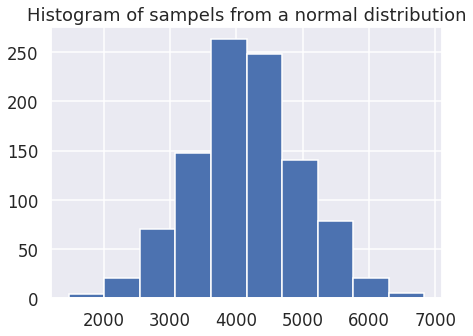

In [19]:
plt.hist(samples)
plt.title('Histogram of sampels from a normal distribution')


####@ 16

Create a histogram of all the body mass values in df.
Does this look like the last histogram?

(Write plotting statements.)

Text(0.5, 1.0, 'Histogram of penguin body mass')

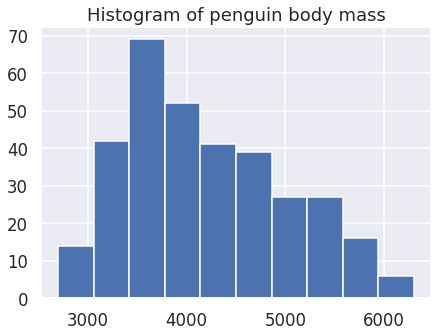

In [20]:
plt.hist(df.body_mass_g)
plt.title('Histogram of penguin body mass')

####@ 17

Create a histogram of body mass for all the penguins from Dream island.
Does this look like the last histogram?

(Write plotting statements.)

Text(0.5, 1.0, 'Histogram of body mass for all penguins from Dream island')

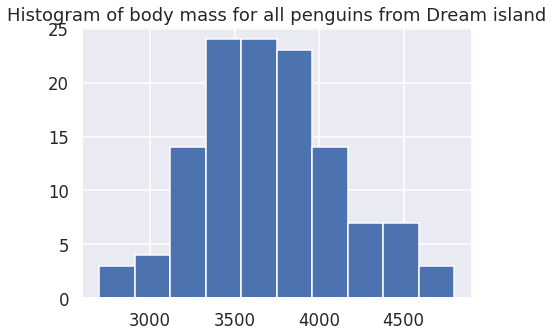

In [21]:
plt.hist(df[df.island == 'Dream'].body_mass_g)
plt.title('Histogram of body mass for all penguins from Dream island')

### Part 4: How are the different species spread out among the islands?

####@ 18

What is the conditional probability that the species is
Adelie given the island is Biscoe?  

You can write multiple
lines, but the last line must be an expression.  I recommend
writing two lines.

Your answer should be a number between 0 and 1, of course.

(Write an expression.)

In [22]:
sdf = df[df.species == 'Adelie']
(sdf['island'] == 'Biscoe').mean()

0.3013698630136986

####@ 19

Create a contingency table (cross tab) showing the islands
as rows and the species as columns.  Use Pandas.

(Write an expression.)

In [23]:
pd.crosstab(df['island'], df['species'])

species,Adelie,Chinstrap,Gentoo
island,,,
Biscoe,44,0,119
Dream,55,68,0
Torgersen,47,0,0


### Part 5: If a species is found on multiple islands, are its characteristics different on the different islands?

####@ 20

Create a density plot of the weight of species Adelie on
island Biscoe.  You can use Seaborn's kdeplot().  

Hint: create a boolean mask by using &.  You can have additional code before your plotting statements if you like.

(Write plotting statements.)

[Text(0.5, 0, 'body mass (g)'),
 Text(0.5, 1.0, 'Weight of Species Adelie on island Biscoe')]

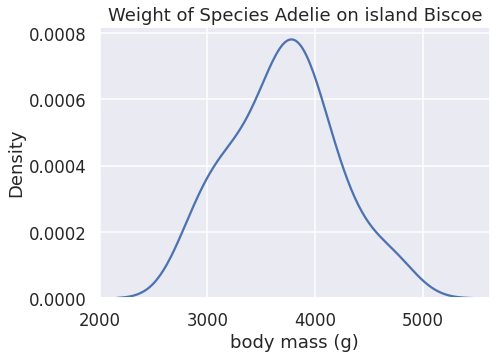

In [24]:
sns.kdeplot(df[(df.island == 'Biscoe')&(df.species == 'Adelie')].body_mass_g).set(title='Weight of Species Adelie on island Biscoe', xlabel='body mass (g)')


####@ 21

Create a "triple density plot" by plotting the weight
of the species Adelie on each of the three islands.

This is easily done with Seaborn on one line.
Use kdeplot() like this: sns.kdeplot('body_mass_g', hue=..., data=...)
The "..." parts are what you need to fill in.  

You will want additional plotting statements for title, etc.

(Write plotting statements.)

[Text(0.5, 0, 'body mass (g)'), Text(0.5, 1.0, 'Body mass of Adelie penguins')]

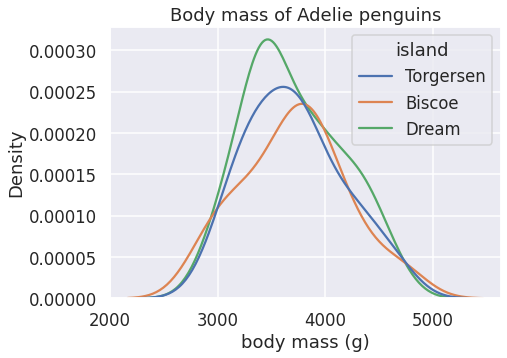

In [31]:
sns.kdeplot('body_mass_g', hue = "island", data = df[df.species == 'Adelie']).set(title='Body mass of Adelie penguins', xlabel='body mass (g)')

### Part 6: If I want to predict the species of a penguin from one measurement, which would be better: bill depth or body mass?


####@ 22

Create a scatterplot of bill depth (x axis) and body mass (y axis).
The points should be colored according to the species.

(Write plotting statements.)

[Text(0, 0.5, 'body mass (g)'),
 Text(0.5, 0, 'bill depth (mm)'),
 Text(0.5, 1.0, 'Body mass by bill depth')]

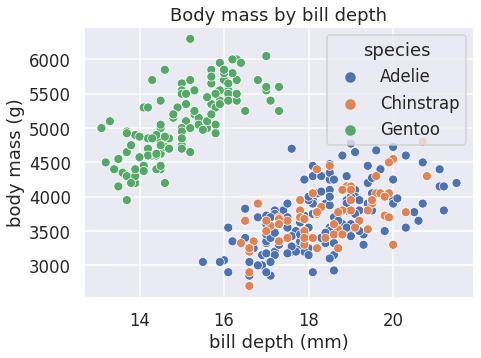

In [26]:
sns.scatterplot( x = "bill_depth_mm", y =  "body_mass_g", data = df, hue = "species").set(title='Body mass by bill depth', xlabel='bill depth (mm)', ylabel='body mass (g)')


####@ 23

Assume that we will predict that a penguin is Gentoo if its bill depth is less than 16.3

Compute the probability that the species is Gentoo given that we predict it's Gentoo.

In other words, compute the probability that the species is Gentoo given that its bill depth is less than 16.3

As usual with conditional probability, you may want to write
2 lines of code.

(Write an expression.)

In [27]:
pGen = df[df.bill_depth_mm < 16.3]
(pGen['species'] == 'Gentoo').mean()

0.9464285714285714

####@ 24

Using the same assumption as in the last problem, compute the probability that the species is *not* Gentoo given we predict it is *not* Gentoo.

(Write an expression.)

In [28]:
pNGen = df[df.bill_depth_mm >= 16.3]
(pNGen['species'] != 'Gentoo').mean()

0.9411764705882353

####@ 25

Now assume that we will predict that a penguin is Gentoo if its body mass is more than 4500 grams.

Compute the probability that the species is Gentoo given we predict it's Gentoo.

(Write an expression.)

In [29]:
gen = df[df.body_mass_g > 4500]
(gen['species'] == 'Gentoo').mean()

0.9196428571428571

####@ 26

Using the same assumption as in the last problem, compute the probability that species is *not* Gentoo given that we predict its *not* Gentoo.

(Write an expression.)

In [30]:
nGen = df[df.body_mass_g <= 4500]
(nGen['species'] != 'Gentoo').mean()

0.9276018099547512

####@ 27

Which do you think is better for classifying a penguin as Gentoo or not: body mass or bill depth?  Explain your answer.

(Write text.)

I think it's better to classify whether a penguin is Gentoo or not Gentoo by bill depth rather than body mass. I think getting the length of the bill depth would produce more accurate result whether the penguin is or isn't Gentoo, and checking the code above where we checked both the body mass and bill depth it seems the bill length gave a more accurate probability.